In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
pd.options.display.max_rows=100

Downloaded the data and saved for future use.

In [3]:
# nodes = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')
# edges = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
# nodes.to_csv('new_nodes.csv')
# edges.to_csv('new_edges.csv')

In [4]:
nodes = pd.read_csv('new_nodes.csv', index_col=0)
nodes.rename(columns={'id': 'Prey-Id'}, inplace=True)
nodes.head()

,Prey-Id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [5]:
nodes['Capacity'] = 0.66
nodes['Priority'] = np.random.randint(1, 4, nodes.shape[0])
nodes.head()

,Prey-Id,X,Y,Capacity,Priority
0,b_bv,1486,732,0.66,2
1,b_bw,716,1357,0.66,1
2,b_end_east,3164,1111,0.66,3
3,b_end_west,141,1938,0.66,2
4,b_g,1725,771,0.66,3


In [6]:
edges  = pd.read_csv('new_edges.csv', index_col=0)
edges.head()

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


In [7]:
edges['distance'] = edges['distance'].apply(lambda x : round(x* 1.60934 + 1.5, 2))
edges.head()

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,1.98,red,0
1,v_rs,b_rs,rs,1.84,red,0
2,b_rs,g_rs,rs,1.68,red,0
3,g_rs,w_rs,rs,1.79,red,0
4,w_rs,o_rs,rs,1.84,red,0


In [8]:
nodes['Prey-Id'].replace('b_end_east', 'Dumpyard', inplace=True)
edges['node2'].replace('b_end_east', 'Dumpyard', inplace=True)

In [9]:
for i, v in list(zip(range(1,4), ['red', 'yellow', 'green'])):
    nodes.loc[nodes['Priority']==i, 'color'] = v

In [10]:
edges.drop(columns=['estimate'], inplace=True)

In [11]:
p = nodes['Prey-Id'].to_list()
x = nodes['X'].to_list()
y = nodes['Y'].to_list()
x_y = tuple(zip(x,y))
p_x_y = tuple(zip(p, x_y))

fixed_pos = {k : v for k, v in p_x_y}

In [12]:
g = nx.Graph()
for i, elrow in edges.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[3])
for i, nlrow in nodes.iterrows():
    attrs = {nlrow[0]: nlrow[1:].to_dict()}
    nx.set_node_attributes(g, attrs)

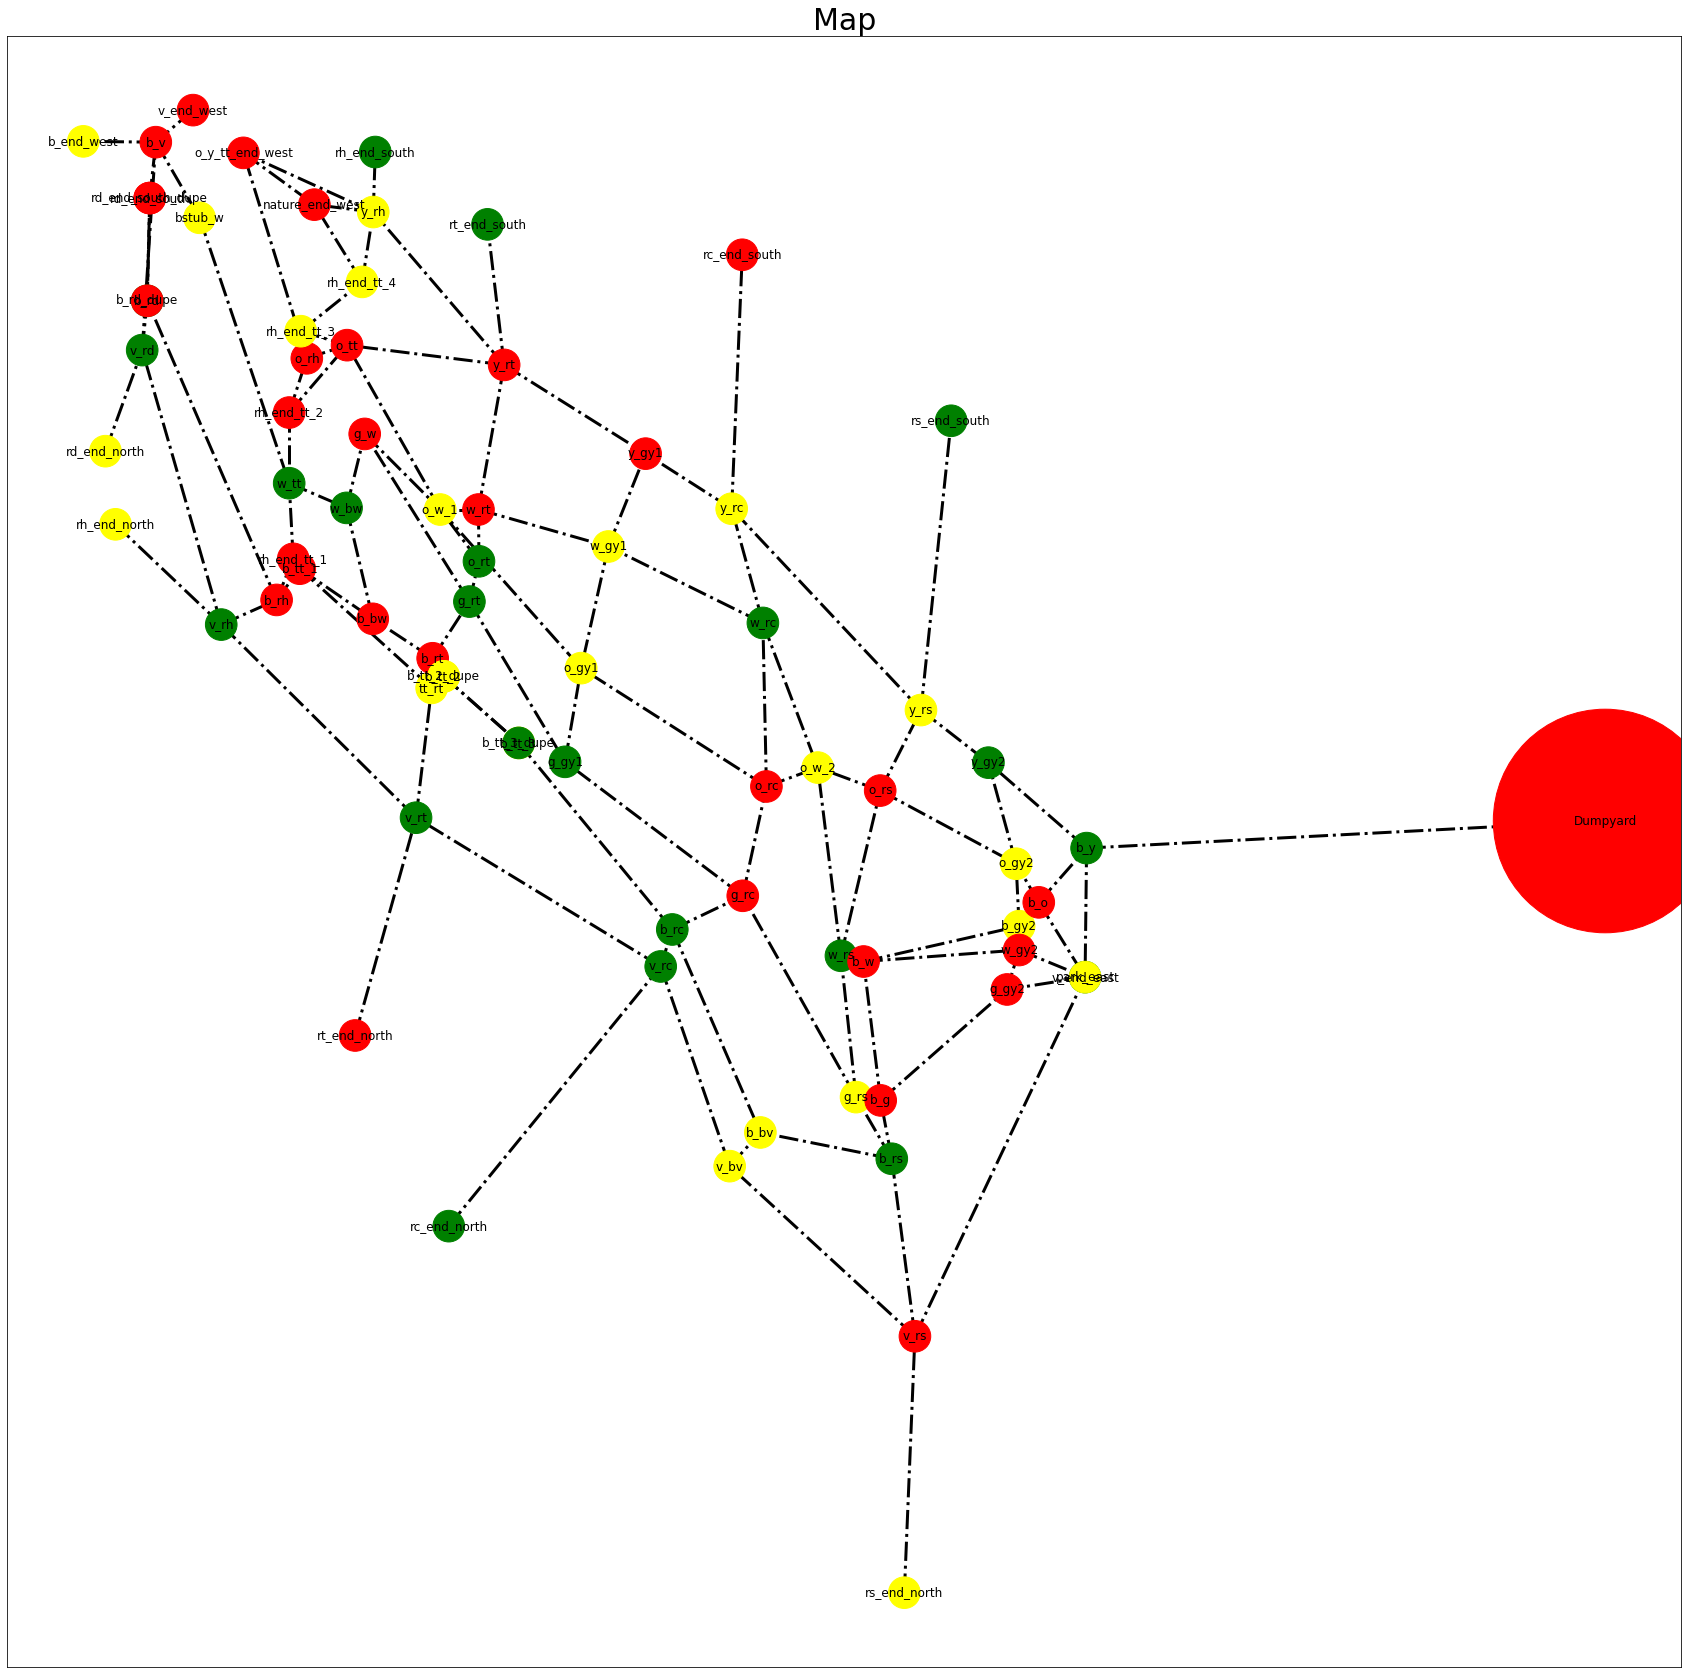

In [13]:
plt.figure(figsize= (30, 30))
nx.spring_layout(g, dim=2, pos=fixed_pos)
sizes = 57*[1000]+ [50000] + [1000] * 19
nx.draw_networkx(g, fixed_pos, node_size=sizes, node_color=nodes['color'], style='dashdot', width=3)
plt.title('Map', fontsize=30)
plt.show()

In [14]:
nodes.to_csv('nodes.csv')
edges.to_csv('edges.csv')

Every point in the map represents a bin location.
There are three categories of bins based on location type. 
1. Red:- high population density area
2. Yellow: - medium population density area
3. Green:- Low population density area

Except for Dumpyard. 